In [2]:
# Importing libraries and adjusting plotting settings
import pandas as pd #cleaning and manipulating data
import numpy as np #numerical operations
import seaborn as sns #plotting graph
import matplotlib.pyplot as plt #plotting graph
from sklearn import preprocessing #statistical models
from sklearn.model_selection import train_test_split #splitting data
from sklearn import linear_model 
from sklearn import metrics #evaluation metrics
import plotly.express as px #graph plotting
from plotly.subplots import make_subplots #graph plotting
import plotly.graph_objects as go #graph plotting
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('legend', fontsize=20)    
plt.rc('figure', titlesize=20)
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

## Reading and cleaning the data

In [5]:
df = pd.read_csv('data/heart_2020_cleaned.csv')

In [11]:
df

,HeartDisease,BMICategory,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Underweight (BMI < 18.5),Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,Normal weight (18.5 <= BMI < 25.0),No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,Overweight (25.0 <= BMI < 30.0),Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,Normal weight (18.5 <= BMI < 25.0),No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,Normal weight (18.5 <= BMI < 25.0),No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Overweight (25.0 <= BMI < 30.0),Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,Overweight (25.0 <= BMI < 30.0),Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,Normal weight (18.5 <= BMI < 25.0),No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,Obese (30.0 <= BMI < +Inf),No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
df.describe()

,PhysicalHealth,MentalHealth,SleepTime
count,319795.00000,319795.000000,319795.000000
mean,3.37171,3.898366,7.097075
std,7.95085,7.955235,1.436007
min,0.00000,0.000000,1.000000
25%,0.00000,0.000000,6.000000
50%,0.00000,0.000000,7.000000
75%,2.00000,3.000000,8.000000
max,30.00000,30.000000,24.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMICategory       319795 non-null  object 
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [81]:
df['GenHealth'].unique()

array([4, 1, 3, 2, 0])

## Checking Correlations - pearson

In [70]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [71]:
df.duplicated().sum()

18078

## BMI Box plot

In [12]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremly Obese (BMI >= 35.0)']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

KeyError: 'BMI'

In [13]:
plt.figure(figsize=(12,8))
sns.boxenplot(x=df.BMI, palette='mako')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'BMI'

<Figure size 864x576 with 0 Axes>

In [82]:
X[:20]

,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,BMICategory,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,3.0,30.0,7,5.0,4,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0.0,0.0,12,7.0,1,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,20.0,30.0,9,8.0,3,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0.0,0.0,11,6.0,1,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,28.0,0.0,4,8.0,1,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
5,6.0,0.0,11,12.0,3,0,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
6,15.0,0.0,10,4.0,1,1,0,1,0,1,...,1,0,0,0,0,1,1,0,0,1
7,5.0,0.0,12,9.0,2,0,1,1,0,1,...,0,1,0,0,0,1,1,0,1,0
8,0.0,0.0,12,5.0,3,1,0,1,0,1,...,1,0,0,0,1,0,0,1,1,0
9,0.0,0.0,9,10.0,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


## Label Encoding

In [55]:
le=preprocessing.LabelEncoder()

In [56]:
order_cols = ["BMICategory", "AgeCategory", "HeartDisease"] #ordinal columns
no_order_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"] #non - ordinal columns

# Label encoding
for col in order_cols:
    df[col] = le.fit_transform(df[col])


## One hot encoding using pd.get_dummies

In [11]:
for col in no_order_cols:
    dummy_col = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[col]

In [66]:
df

,HeartDisease,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,BMICategory,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,3.0,30.0,7,5.0,4,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,0.0,0.0,12,7.0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,20.0,30.0,9,8.0,3,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,0,0.0,0.0,11,6.0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,0,28.0,0.0,4,8.0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,7.0,0.0,8,6.0,3,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
319791,0,0.0,0.0,3,5.0,3,0,1,1,0,...,0,0,0,1,0,1,1,0,1,0
319792,0,0.0,0.0,5,6.0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
319793,0,0.0,0.0,1,12.0,2,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


## Checking ratio

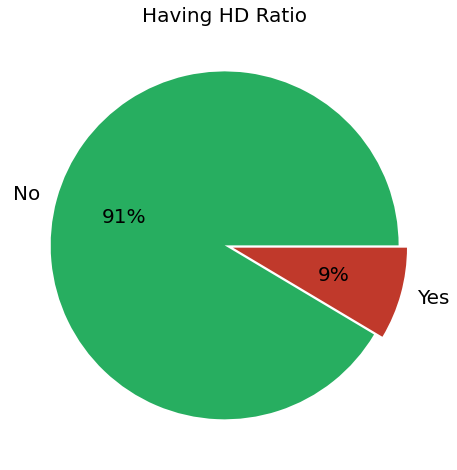

In [12]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

In [13]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

## Sampling techniques due to imbalance

In [14]:
from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X, Y = over.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2022, stratify=Y)

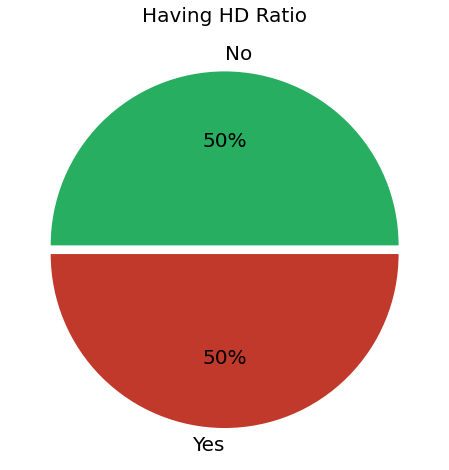

In [15]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(Y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

## Model building

In [19]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

In [20]:
models = {
    "DT":DecisionTreeClassifier(random_state = 2022, max_depth=15),
    "Logistic": LogisticRegression(random_state = 2022),
    "SGD": SGDClassifier(random_state = 2022),
    "RF":RandomForestClassifier(random_state = 2022, max_depth=15),
    "Ada":AdaBoostClassifier(random_state=2022),
    "XGB":XGBClassifier(random_state=2022)
}
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

In [ ]:
test_models(X_train, X_test, y_train, y_test)

## Comparing Models

In [22]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score
0,DT,0.945,0.935,89.03,97.82,93.22
1,Logistic,0.937,0.938,89.68,97.67,93.51
2,SGD,0.946,0.947,89.36,100.00,94.38
3,RF,0.947,0.942,91.23,96.92,93.99
4,Ada,0.932,0.933,89.83,96.57,93.08
5,XGB,0.954,0.953,91.35,99.16,95.09


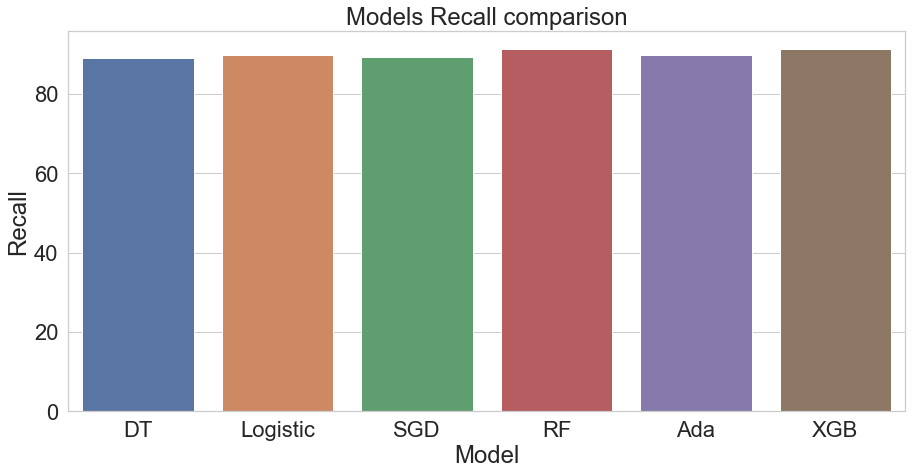

In [23]:
plt.figure(figsize=(15, 7))
sns.set_theme(style="whitegrid", font_scale=2)
ax = sns.barplot(x='Model', y="Recall", data=results)
#ax.label(ax.containers[0], label_type='edge')
ax.set_title('Models Recall comparison')
fig.show()

In [24]:
def fit_model_result(x_train, x_test, y_train, y_test, model):
    # Modelling
    reg = model
    reg.fit(x_train,y_train)
    
    # Getting evaluation results
    y_pred = reg.predict(x_test)
    report = metrics.classification_report(y_test, y_pred, digits=5, output_dict=True)
    recall = round(report['weighted avg']['recall']*100, 2)
    precision = round(report['weighted avg']['precision']*100, 2)
    f1 = round(report['weighted avg']['f1-score']*100,2)
    test_score = round(report['accuracy']*100,2)
    train_score = round(reg.score(x_train,y_train)*100,2)
    print(metrics.classification_report(y_test, y_pred, digits=5))
    
    # Displaying confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    metrics.plot_confusion_matrix(reg, x_test, y_test, cmap='Blues', normalize='true',ax=ax, display_labels=['No HD','HD'])
    plt.show()

[17:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0    0.91984   0.99222   0.95466     73105
           1    0.99155   0.91354   0.95095     73106

    accuracy                        0.95288    146211
   macro avg    0.95570   0.95288   0.95280    146211
weighted avg    0.95570   0.95288   0.95280    146211



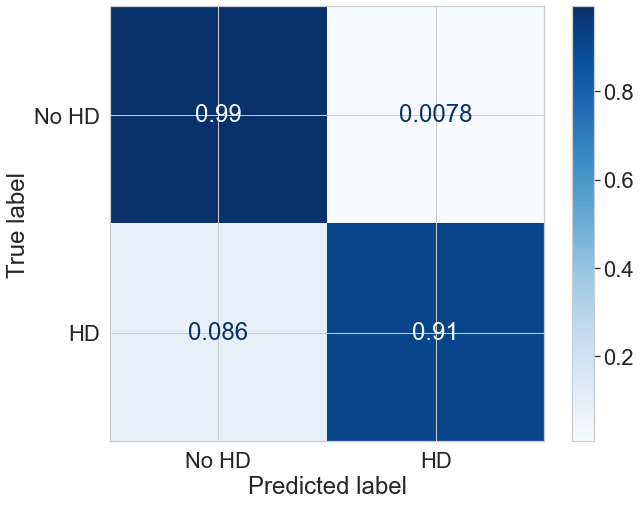

In [25]:
fit_model_result(X_train, X_test, y_train, y_test,XGBClassifier(random_state=2022))

## XBNet model

In [26]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET

In [29]:
model = XBNETClassifier(X_train,y_train,num_layers=2)

Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: True
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


In [30]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [49]:
m,acc, lo, val_ac, val_lo = run_XBNET(X_train.values,X_test.values,y_train.values,y_test.values,model,criterion,optimizer,epochs=100,batch_size=32)

Percentage training completed:   0%|                                                           | 0/100 [00:00<?, ?it/s]

Training Loss after epoch 1 is 0.15884291553938598 and Accuracy is 94.24461907790796


Percentage training completed:   1%|▍                                              | 1/100 [12:53<21:16:02, 773.36s/it]

Validation Loss after epoch 1 is 0.14671030640602112 and Accuracy is 94.39440260992674
Training Loss after epoch 2 is 0.1577556926606542 and Accuracy is 94.27562449701686


Percentage training completed:   2%|▉                                              | 2/100 [25:22<20:51:22, 766.15s/it]

Validation Loss after epoch 2 is 0.1463661789894104 and Accuracy is 94.41150118664122
Training Loss after epoch 3 is 0.15698137885217886 and Accuracy is 94.30913770737723


Percentage training completed:   3%|█▍                                             | 3/100 [38:07<20:38:00, 765.78s/it]

Validation Loss after epoch 3 is 0.14499513804912567 and Accuracy is 94.44091073859012
Training Loss after epoch 4 is 0.15634815890936066 and Accuracy is 94.327376189206


Percentage training completed:   4%|█▉                                             | 4/100 [50:40<20:19:11, 761.99s/it]

Validation Loss after epoch 4 is 0.1448308378458023 and Accuracy is 94.46484874599038
Training Loss after epoch 5 is 0.15593798392935898 and Accuracy is 94.34652659512622


Percentage training completed:   5%|██▎                                          | 5/100 [1:03:16<20:03:28, 760.09s/it]

Validation Loss after epoch 5 is 0.14423592388629913 and Accuracy is 94.43954285245296
Training Loss after epoch 6 is 0.15559338622844443 and Accuracy is 94.35610179808633


Percentage training completed:   6%|██▋                                          | 6/100 [1:16:10<19:57:10, 764.15s/it]

Validation Loss after epoch 6 is 0.1439158171415329 and Accuracy is 94.53529488205402
Training Loss after epoch 7 is 0.15525977065034488 and Accuracy is 94.36339719081784


Percentage training completed:   7%|███▏                                         | 7/100 [1:29:03<19:48:34, 766.82s/it]

Validation Loss after epoch 7 is 0.14347079396247864 and Accuracy is 94.48263126577343
Training Loss after epoch 8 is 0.15509589678197658 and Accuracy is 94.37730403321227


Percentage training completed:   8%|███▌                                         | 8/100 [1:41:38<19:30:43, 763.52s/it]

Validation Loss after epoch 8 is 0.14355646073818207 and Accuracy is 94.47510789201907
Training Loss after epoch 9 is 0.15485600428509672 and Accuracy is 94.38391548287521


Percentage training completed:   9%|████                                         | 9/100 [1:54:07<19:11:17, 759.09s/it]

Validation Loss after epoch 9 is 0.14347654581069946 and Accuracy is 94.52161602068244
Training Loss after epoch 10 is 0.1546463755029111 and Accuracy is 94.38573933105808


Percentage training completed:  10%|████▍                                       | 10/100 [2:06:39<18:55:24, 756.94s/it]

Validation Loss after epoch 10 is 0.14319321513175964 and Accuracy is 94.50793715931086
Training Loss after epoch 11 is 0.1544600386090801 and Accuracy is 94.3969104011782


Percentage training completed:  11%|████▊                                       | 11/100 [2:19:10<18:40:13, 755.21s/it]

Validation Loss after epoch 11 is 0.14316678047180176 and Accuracy is 94.5134087038595
Training Loss after epoch 12 is 0.1542477349815988 and Accuracy is 94.3946305909496


Percentage training completed:  12%|█████▎                                      | 12/100 [2:31:51<18:30:11, 756.94s/it]

Validation Loss after epoch 12 is 0.14252518117427826 and Accuracy is 94.59069427060892
Training Loss after epoch 13 is 0.1541888379900661 and Accuracy is 94.40306588879541


Percentage training completed:  13%|█████▋                                      | 13/100 [2:44:54<18:28:37, 764.57s/it]

Validation Loss after epoch 13 is 0.1427498757839203 and Accuracy is 94.57017597855155
Training Loss after epoch 14 is 0.1540686407311691 and Accuracy is 94.40739752822975


Percentage training completed:  14%|██████▏                                     | 14/100 [2:57:23<18:09:31, 760.13s/it]

Validation Loss after epoch 14 is 0.14286991953849792 and Accuracy is 94.56949203548297
Training Loss after epoch 15 is 0.15382974797479732 and Accuracy is 94.40762550925261


Percentage training completed:  15%|██████▌                                     | 15/100 [3:10:03<17:56:34, 759.93s/it]

Validation Loss after epoch 15 is 0.1422642171382904 and Accuracy is 94.55307740183707
Training Loss after epoch 16 is 0.15375956329231039 and Accuracy is 94.40557368004687


Percentage training completed:  16%|███████                                     | 16/100 [3:22:42<17:43:31, 759.66s/it]

Validation Loss after epoch 16 is 0.1424948275089264 and Accuracy is 94.58317089685454
Training Loss after epoch 17 is 0.15371354405854093 and Accuracy is 94.41241311073266


Percentage training completed:  17%|███████▍                                    | 17/100 [3:35:12<17:27:04, 756.92s/it]

Validation Loss after epoch 17 is 0.14246346056461334 and Accuracy is 94.54487008501413
Training Loss after epoch 18 is 0.15357829842565357 and Accuracy is 94.40830945232119


Percentage training completed:  18%|███████▉                                    | 18/100 [3:47:45<17:12:37, 755.58s/it]

Validation Loss after epoch 18 is 0.14203473925590515 and Accuracy is 94.59411398595181
Training Loss after epoch 19 is 0.1534891281689881 and Accuracy is 94.41058926254979


Percentage training completed:  19%|████████▎                                   | 19/100 [4:00:16<16:58:03, 754.12s/it]

Validation Loss after epoch 19 is 0.14198879897594452 and Accuracy is 94.58659061219744
Training Loss after epoch 20 is 0.1533782122932404 and Accuracy is 94.41993648448702


Percentage training completed:  20%|████████▊                                   | 20/100 [4:12:44<16:43:09, 752.37s/it]

Validation Loss after epoch 20 is 0.1430138349533081 and Accuracy is 94.57769935230591
Training Loss after epoch 21 is 0.15323534870193714 and Accuracy is 94.41355301584696


Percentage training completed:  21%|█████████▏                                  | 21/100 [4:25:14<16:29:46, 751.73s/it]

Validation Loss after epoch 21 is 0.14236736297607422 and Accuracy is 94.57427963696301
Training Loss after epoch 22 is 0.15318172879194092 and Accuracy is 94.41309705380124


Percentage training completed:  22%|█████████▋                                  | 22/100 [4:37:44<16:16:40, 751.28s/it]

Validation Loss after epoch 22 is 0.14236247539520264 and Accuracy is 94.56128471866002
Training Loss after epoch 23 is 0.15306879812022678 and Accuracy is 94.4240401428985


Percentage training completed:  23%|██████████                                  | 23/100 [4:50:13<16:02:59, 750.38s/it]

Validation Loss after epoch 23 is 0.14234134554862976 and Accuracy is 94.61941987948923
Training Loss after epoch 24 is 0.1530111792195615 and Accuracy is 94.41492090198412


Percentage training completed:  24%|██████████▌                                 | 24/100 [5:02:43<15:50:33, 750.44s/it]

Validation Loss after epoch 24 is 0.14181753993034363 and Accuracy is 94.6139483349406
Training Loss after epoch 25 is 0.15286086476499663 and Accuracy is 94.42130437062418


Percentage training completed:  25%|███████████                                 | 25/100 [5:15:14<15:38:09, 750.53s/it]

Validation Loss after epoch 25 is 0.14199621975421906 and Accuracy is 94.62831113938076
Training Loss after epoch 26 is 0.1527252462405512 and Accuracy is 94.4274598582414


Percentage training completed:  26%|███████████▍                                | 26/100 [5:27:43<15:24:59, 750.00s/it]

Validation Loss after epoch 26 is 0.14203986525535583 and Accuracy is 94.59206215674607
Training Loss after epoch 27 is 0.15277607158943493 and Accuracy is 94.42039244653274


Percentage training completed:  27%|███████████▉                                | 27/100 [5:40:14<15:12:57, 750.38s/it]

Validation Loss after epoch 27 is 0.14271166920661926 and Accuracy is 94.6365184562037
Training Loss after epoch 28 is 0.1525367363251766 and Accuracy is 94.42244427573848


Percentage training completed:  28%|████████████▎                               | 28/100 [5:52:42<14:59:36, 749.68s/it]

Validation Loss after epoch 28 is 0.14179711043834686 and Accuracy is 94.62010382255781
Training Loss after epoch 29 is 0.15251896798664769 and Accuracy is 94.42609197210425


Percentage training completed:  29%|████████████▊                               | 29/100 [6:05:13<14:47:25, 749.94s/it]

Validation Loss after epoch 29 is 0.1423807293176651 and Accuracy is 94.62283959483213
Training Loss after epoch 30 is 0.15247326020598695 and Accuracy is 94.43589515608721


Percentage training completed:  30%|█████████████▏                              | 30/100 [6:17:43<14:35:13, 750.19s/it]

Validation Loss after epoch 30 is 0.14245890080928802 and Accuracy is 94.65361703291818
Training Loss after epoch 31 is 0.15234521955425892 and Accuracy is 94.42449610494423


Percentage training completed:  31%|█████████████▋                              | 31/100 [6:30:13<14:22:32, 750.04s/it]

Validation Loss after epoch 31 is 0.14200054109096527 and Accuracy is 94.66182434974112
Training Loss after epoch 32 is 0.15231543773706965 and Accuracy is 94.42973966846999


Percentage training completed:  32%|██████████████                              | 32/100 [6:42:45<14:10:47, 750.70s/it]

Validation Loss after epoch 32 is 0.14311692118644714 and Accuracy is 94.60574101811766
Training Loss after epoch 33 is 0.152169582894972 and Accuracy is 94.43863092836152


Percentage training completed:  33%|██████████████▌                             | 33/100 [6:55:28<14:02:26, 754.42s/it]

Validation Loss after epoch 33 is 0.1429147869348526 and Accuracy is 94.63515057006654
Training Loss after epoch 34 is 0.15210255106265905 and Accuracy is 94.44068275756726


Percentage training completed:  34%|██████████████▉                             | 34/100 [7:07:56<13:47:37, 752.38s/it]

Validation Loss after epoch 34 is 0.14276309311389923 and Accuracy is 94.63857028540944
Training Loss after epoch 35 is 0.15202828506763283 and Accuracy is 94.44296256779586


Percentage training completed:  35%|███████████████▍                            | 35/100 [7:20:24<13:33:49, 751.22s/it]

Validation Loss after epoch 35 is 0.14231127500534058 and Accuracy is 94.64609365916381
Training Loss after epoch 36 is 0.15191284768780824 and Accuracy is 94.44524237802446


Percentage training completed:  36%|███████████████▊                            | 36/100 [7:32:54<13:20:38, 750.60s/it]

Validation Loss after epoch 36 is 0.14263933897018433 and Accuracy is 94.67003166656407
Training Loss after epoch 37 is 0.15184206380557078 and Accuracy is 94.4454703590473


Percentage training completed:  37%|████████████████▎                           | 37/100 [7:45:24<13:07:58, 750.46s/it]

Validation Loss after epoch 37 is 0.1430983990430832 and Accuracy is 94.64882943143813
Training Loss after epoch 38 is 0.15171679998534673 and Accuracy is 94.44797815029877


Percentage training completed:  38%|████████████████▋                           | 38/100 [7:57:53<12:54:56, 749.94s/it]

Validation Loss after epoch 38 is 0.1424795538187027 and Accuracy is 94.64882943143813
Training Loss after epoch 39 is 0.1515888344199047 and Accuracy is 94.43680708017865


Percentage training completed:  39%|█████████████████▏                          | 39/100 [8:10:20<12:41:40, 749.19s/it]

Validation Loss after epoch 39 is 0.14243006706237793 and Accuracy is 94.60505707504907
Training Loss after epoch 40 is 0.15156639148503612 and Accuracy is 94.44797815029877


Percentage training completed:  40%|█████████████████▌                          | 40/100 [8:22:48<12:28:42, 748.71s/it]

Validation Loss after epoch 40 is 0.14250844717025757 and Accuracy is 94.64540971609523
Training Loss after epoch 41 is 0.15152865686261743 and Accuracy is 94.44683824518447


Percentage training completed:  41%|██████████████████                          | 41/100 [8:35:15<12:15:59, 748.46s/it]

Validation Loss after epoch 41 is 0.1427880823612213 and Accuracy is 94.66387617894686
Training Loss after epoch 42 is 0.15132141740018268 and Accuracy is 94.45322171382455


Percentage training completed:  42%|██████████████████▍                         | 42/100 [8:47:45<12:03:44, 748.70s/it]

Validation Loss after epoch 42 is 0.14090768992900848 and Accuracy is 94.64540971609523
Training Loss after epoch 43 is 0.15127629505549614 and Accuracy is 94.45732537223601


Percentage training completed:  43%|██████████████████▉                         | 43/100 [9:00:12<11:50:50, 748.26s/it]

Validation Loss after epoch 43 is 0.1425606608390808 and Accuracy is 94.6529330898496
Training Loss after epoch 44 is 0.15125397128932289 and Accuracy is 94.455729505076


Percentage training completed:  44%|███████████████████▎                        | 44/100 [9:12:41<11:38:31, 748.42s/it]

Validation Loss after epoch 44 is 0.14165376126766205 and Accuracy is 94.6919178447586
Training Loss after epoch 45 is 0.15111200135138847 and Accuracy is 94.44433045393302


Percentage training completed:  45%|███████████████████▊                        | 45/100 [9:25:08<11:25:52, 748.22s/it]

Validation Loss after epoch 45 is 0.1429612636566162 and Accuracy is 94.66456012201544
Training Loss after epoch 46 is 0.15100956605888657 and Accuracy is 94.4438744918873


Percentage training completed:  46%|████████████████████▏                       | 46/100 [9:37:34<11:12:35, 747.32s/it]

Validation Loss after epoch 46 is 0.14264565706253052 and Accuracy is 94.64814548836955
Training Loss after epoch 47 is 0.15095590415675936 and Accuracy is 94.4500299795045


Percentage training completed:  47%|████████████████████▋                       | 47/100 [9:50:01<11:00:10, 747.37s/it]

Validation Loss after epoch 47 is 0.14270275831222534 and Accuracy is 94.6529330898496
Training Loss after epoch 48 is 0.15086804387758335 and Accuracy is 94.44797815029877


Percentage training completed:  48%|████████████████████▋                      | 48/100 [10:02:29<10:47:52, 747.55s/it]

Validation Loss after epoch 48 is 0.14137578010559082 and Accuracy is 94.64130605768376
Training Loss after epoch 49 is 0.15081822462136707 and Accuracy is 94.45504556200741


Percentage training completed:  49%|█████████████████████                      | 49/100 [10:14:55<10:35:01, 747.10s/it]

Validation Loss after epoch 49 is 0.14291900396347046 and Accuracy is 94.6365184562037
Training Loss after epoch 50 is 0.1507253238803503 and Accuracy is 94.44957401745879


Percentage training completed:  50%|█████████████████████▌                     | 50/100 [10:27:23<10:22:40, 747.21s/it]

Validation Loss after epoch 50 is 0.1427670121192932 and Accuracy is 94.64882943143813
Training Loss after epoch 51 is 0.15066737675264685 and Accuracy is 94.45367767587027


Percentage training completed:  51%|█████████████████████▉                     | 51/100 [10:39:50<10:10:21, 747.37s/it]

Validation Loss after epoch 51 is 0.1421351432800293 and Accuracy is 94.65703674826108
Training Loss after epoch 52 is 0.15053076669223892 and Accuracy is 94.46188499269321


Percentage training completed:  52%|██████████████████████▉                     | 52/100 [10:52:18<9:57:55, 747.41s/it]

Validation Loss after epoch 52 is 0.14185889065265656 and Accuracy is 94.67755504031844
Training Loss after epoch 53 is 0.15044864290906837 and Accuracy is 94.46690057519612


Percentage training completed:  53%|███████████████████████▎                    | 53/100 [11:04:44<9:45:15, 747.13s/it]

Validation Loss after epoch 53 is 0.1428237110376358 and Accuracy is 94.65088126064387
Training Loss after epoch 54 is 0.15031812087997418 and Accuracy is 94.46234095473893


Percentage training completed:  54%|███████████████████████▊                    | 54/100 [11:17:15<9:33:35, 748.16s/it]

Validation Loss after epoch 54 is 0.1412084996700287 and Accuracy is 94.65224914678102
Training Loss after epoch 55 is 0.15030325217650667 and Accuracy is 94.47168817667617


Percentage training completed:  55%|████████████████████████▏                   | 55/100 [11:29:42<9:20:51, 747.81s/it]

Validation Loss after epoch 55 is 0.1420471966266632 and Accuracy is 94.61121256266628
Training Loss after epoch 56 is 0.1501975424904599 and Accuracy is 94.47533587304193


Percentage training completed:  56%|████████████████████████▋                   | 56/100 [11:42:09<9:08:17, 747.66s/it]

Validation Loss after epoch 56 is 0.14201858639717102 and Accuracy is 94.64267394382091
Training Loss after epoch 57 is 0.1501353041967377 and Accuracy is 94.47032029053902


Percentage training completed:  57%|█████████████████████████                   | 57/100 [11:54:35<8:55:25, 747.12s/it]

Validation Loss after epoch 57 is 0.14174558222293854 and Accuracy is 94.64951337450671
Training Loss after epoch 58 is 0.15006415658316682 and Accuracy is 94.47282808179047


Percentage training completed:  58%|█████████████████████████▌                  | 58/100 [12:07:01<8:42:46, 746.83s/it]

Validation Loss after epoch 58 is 0.14133292436599731 and Accuracy is 94.64404182995807
Training Loss after epoch 59 is 0.14996968308749176 and Accuracy is 94.47647577815623


Percentage training completed:  59%|█████████████████████████▉                  | 59/100 [12:19:29<8:30:26, 746.98s/it]

Validation Loss after epoch 59 is 0.14153778553009033 and Accuracy is 94.67208349576981
Training Loss after epoch 60 is 0.14993435425336274 and Accuracy is 94.48103539861341


Percentage training completed:  60%|██████████████████████████▍                 | 60/100 [12:31:55<8:17:54, 746.87s/it]

Validation Loss after epoch 60 is 0.14137674868106842 and Accuracy is 94.68371052793566
Training Loss after epoch 61 is 0.14988262882652667 and Accuracy is 94.47214413872189


Percentage training completed:  61%|██████████████████████████▊                 | 61/100 [12:44:24<8:05:45, 747.31s/it]

Validation Loss after epoch 61 is 0.141957089304924 and Accuracy is 94.63788634234086
Training Loss after epoch 62 is 0.1498016338369915 and Accuracy is 94.48468309497918


Percentage training completed:  62%|███████████████████████████▎                | 62/100 [12:56:50<7:53:09, 747.10s/it]

Validation Loss after epoch 62 is 0.1419515162706375 and Accuracy is 94.65430097598676
Training Loss after epoch 63 is 0.14976490878770854 and Accuracy is 94.48080741759055


Percentage training completed:  63%|███████████████████████████▋                | 63/100 [13:09:16<7:40:28, 746.72s/it]

Validation Loss after epoch 63 is 0.14141705632209778 and Accuracy is 94.67208349576981
Training Loss after epoch 64 is 0.14969220681761825 and Accuracy is 94.48559501907062


Percentage training completed:  64%|████████████████████████████▏               | 64/100 [13:21:44<7:28:14, 747.08s/it]

Validation Loss after epoch 64 is 0.14187125861644745 and Accuracy is 94.59343004288323
Training Loss after epoch 65 is 0.14959556775267863 and Accuracy is 94.49334637384784


Percentage training completed:  65%|████████████████████████████▌               | 65/100 [13:34:10<7:15:33, 746.67s/it]

Validation Loss after epoch 65 is 0.1412188559770584 and Accuracy is 94.6365184562037
Training Loss after epoch 66 is 0.14959011683453186 and Accuracy is 94.48149136065913


Percentage training completed:  66%|█████████████████████████████               | 66/100 [13:46:37<7:03:09, 746.75s/it]

Validation Loss after epoch 66 is 0.14147640764713287 and Accuracy is 94.67687109724986
Training Loss after epoch 67 is 0.14954169244614984 and Accuracy is 94.47875558838483


Percentage training completed:  67%|█████████████████████████████▍              | 67/100 [13:59:03<6:50:37, 746.60s/it]

Validation Loss after epoch 67 is 0.14096279442310333 and Accuracy is 94.62899508244934
Training Loss after epoch 68 is 0.14944392880947316 and Accuracy is 94.48787482929922


Percentage training completed:  68%|█████████████████████████████▉              | 68/100 [14:11:30<6:38:14, 746.69s/it]

Validation Loss after epoch 68 is 0.14110928773880005 and Accuracy is 94.63925422847802
Training Loss after epoch 69 is 0.14940678825253947 and Accuracy is 94.49289041180212


Percentage training completed:  69%|██████████████████████████████▎             | 69/100 [14:23:56<6:25:47, 746.68s/it]

Validation Loss after epoch 69 is 0.14101913571357727 and Accuracy is 94.66797983735835
Training Loss after epoch 70 is 0.14940427423057778 and Accuracy is 94.49175050668782


Percentage training completed:  70%|██████████████████████████████▊             | 70/100 [14:36:23<6:13:16, 746.54s/it]

Validation Loss after epoch 70 is 0.14142249524593353 and Accuracy is 94.57222780775729
Training Loss after epoch 71 is 0.14932146176507222 and Accuracy is 94.4874188672535


Percentage training completed:  71%|███████████████████████████████▏            | 71/100 [14:48:49<6:00:52, 746.63s/it]

Validation Loss after epoch 71 is 0.1414855271577835 and Accuracy is 94.6563528051925
Training Loss after epoch 72 is 0.1492781770479264 and Accuracy is 94.48992665850494


Percentage training completed:  72%|███████████████████████████████▋            | 72/100 [15:01:16<5:48:22, 746.52s/it]

Validation Loss after epoch 72 is 0.14123395085334778 and Accuracy is 94.66319223587828
Training Loss after epoch 73 is 0.14925273044984913 and Accuracy is 94.49425829793928


Percentage training completed:  73%|████████████████████████████████            | 73/100 [15:13:43<5:36:04, 746.85s/it]

Validation Loss after epoch 73 is 0.1408693492412567 and Accuracy is 94.65703674826108
Training Loss after epoch 74 is 0.1491467784726389 and Accuracy is 94.48969867748208


Percentage training completed:  74%|████████████████████████████████▌           | 74/100 [15:26:12<5:23:50, 747.32s/it]

Validation Loss after epoch 74 is 0.14092262089252472 and Accuracy is 94.71517190909029
Training Loss after epoch 75 is 0.14912612463428734 and Accuracy is 94.49289041180212


Percentage training completed:  75%|█████████████████████████████████           | 75/100 [15:38:38<5:11:14, 746.98s/it]

Validation Loss after epoch 75 is 0.1405404806137085 and Accuracy is 94.67276743883839
Training Loss after epoch 76 is 0.149076923324595 and Accuracy is 94.49311839282498


Percentage training completed:  76%|█████████████████████████████████▍          | 76/100 [15:51:05<4:58:46, 746.92s/it]

Validation Loss after epoch 76 is 0.14149720966815948 and Accuracy is 94.70286093385586
Training Loss after epoch 77 is 0.1489787779835471 and Accuracy is 94.50976100749374


Percentage training completed:  77%|█████████████████████████████████▉          | 77/100 [16:03:32<4:46:22, 747.08s/it]

Validation Loss after epoch 77 is 0.14004360139369965 and Accuracy is 94.68097475566134
Training Loss after epoch 78 is 0.14896946067942607 and Accuracy is 94.494714259985


Percentage training completed:  78%|██████████████████████████████████▎         | 78/100 [16:16:01<4:34:04, 747.49s/it]

Validation Loss after epoch 78 is 0.14074337482452393 and Accuracy is 94.67755504031844
Training Loss after epoch 79 is 0.1489222906721834 and Accuracy is 94.49403031691642


Percentage training completed:  79%|██████████████████████████████████▊         | 79/100 [16:28:27<4:21:29, 747.10s/it]

Validation Loss after epoch 79 is 0.14090968668460846 and Accuracy is 94.69465361703291
Training Loss after epoch 80 is 0.1489188544775789 and Accuracy is 94.50862110237944


Percentage training completed:  80%|███████████████████████████████████▏        | 80/100 [16:40:55<4:09:10, 747.52s/it]

Validation Loss after epoch 80 is 0.14073415100574493 and Accuracy is 94.59548187208897
Training Loss after epoch 81 is 0.1488505671409752 and Accuracy is 94.4924344497564


Percentage training completed:  81%|███████████████████████████████████▋        | 81/100 [16:53:25<3:56:56, 748.25s/it]

Validation Loss after epoch 81 is 0.14109475910663605 and Accuracy is 94.65361703291818
Training Loss after epoch 82 is 0.14888170769414097 and Accuracy is 94.50679725419656


Percentage training completed:  82%|████████████████████████████████████        | 82/100 [17:05:54<3:44:29, 748.33s/it]

Validation Loss after epoch 82 is 0.1405162215232849 and Accuracy is 94.6987572754444
Training Loss after epoch 83 is 0.1487844704307177 and Accuracy is 94.49904589941933


Percentage training completed:  83%|████████████████████████████████████▌       | 83/100 [17:18:22<3:31:58, 748.17s/it]

Validation Loss after epoch 83 is 0.1406676173210144 and Accuracy is 94.6789229264556
Training Loss after epoch 84 is 0.14878396585450931 and Accuracy is 94.49881791839647


Percentage training completed:  84%|████████████████████████████████████▉       | 84/100 [17:30:50<3:19:32, 748.26s/it]

Validation Loss after epoch 84 is 0.14047427475452423 and Accuracy is 94.6529330898496
Training Loss after epoch 85 is 0.1487450777695832 and Accuracy is 94.4958541650993


Percentage training completed:  85%|█████████████████████████████████████▍      | 85/100 [17:43:22<3:07:20, 749.35s/it]

Validation Loss after epoch 85 is 0.14060832560062408 and Accuracy is 94.67413532497555
Training Loss after epoch 86 is 0.14866267585709636 and Accuracy is 94.49334637384784


Percentage training completed:  86%|█████████████████████████████████████▊      | 86/100 [17:56:11<2:56:13, 755.27s/it]

Validation Loss after epoch 86 is 0.1406950205564499 and Accuracy is 94.67208349576981
Training Loss after epoch 87 is 0.1486428239654428 and Accuracy is 94.49972984248791


Percentage training completed:  87%|██████████████████████████████████████▎     | 87/100 [18:08:36<2:42:59, 752.26s/it]

Validation Loss after epoch 87 is 0.1409657895565033 and Accuracy is 94.62420748096929
Training Loss after epoch 88 is 0.14856548442815515 and Accuracy is 94.50041378555649


Percentage training completed:  88%|██████████████████████████████████████▋     | 88/100 [18:21:08<2:30:26, 752.25s/it]

Validation Loss after epoch 88 is 0.14091351628303528 and Accuracy is 94.70012516158155
Training Loss after epoch 89 is 0.14854833640939896 and Accuracy is 94.50360551987653


Percentage training completed:  89%|███████████████████████████████████████▏    | 89/100 [18:33:41<2:17:56, 752.38s/it]

Validation Loss after epoch 89 is 0.1409161388874054 and Accuracy is 94.67345138190697
Training Loss after epoch 90 is 0.14849953342497219 and Accuracy is 94.51135687465376


Percentage training completed:  90%|███████████████████████████████████████▌    | 90/100 [18:46:08<2:05:08, 750.86s/it]

Validation Loss after epoch 90 is 0.14058656990528107 and Accuracy is 94.68986601555287
Training Loss after epoch 91 is 0.14848586599639968 and Accuracy is 94.50314955783081


Percentage training completed:  91%|████████████████████████████████████████    | 91/100 [18:58:43<1:52:48, 752.01s/it]

Validation Loss after epoch 91 is 0.14080160856246948 and Accuracy is 94.70012516158155
Training Loss after epoch 92 is 0.14843527202349457 and Accuracy is 94.50132570964793


Percentage training completed:  92%|███████████████████████████████████████▌   | 92/100 [19:35:56<2:39:30, 1196.25s/it]

Validation Loss after epoch 92 is 0.14055800437927246 and Accuracy is 94.70149304771871


Percentage training completed:  92%|████████████████████████████████████████▍   | 92/100 [19:44:02<1:42:57, 772.20s/it]


KeyboardInterrupt: 

NameError: name 'acc' is not defined

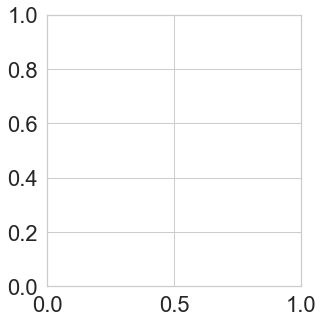

In [102]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(acc,label='training accuracy')
plt.plot(val_ac,label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(lo,label='training loss')
plt.plot(val_lo,label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [51]:
from sklearn.metrics import classification_report

In [56]:
from XBNet.training_utils import training,predict

In [35]:
def predict(model,X):
    X = torch.from_numpy(X)
    y_pred = model(X.float(), train=False)
    if model.name == "Classification":
        if model.labels == 1:
            if y_pred < torch.Tensor([0.5]):
                y_pred = 0
            else:
                y_pred = 1
        else:
            y_pred = np.argmax(y_pred.detach().numpy(),axis=1)
        return y_pred
    else:
        return y_pred.detach().numpy()[0]

In [61]:
print(classification_report(y_train,predict(model,X_train.values).round()))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    219317
           1       0.97      0.91      0.94    219316

    accuracy                           0.94    438633
   macro avg       0.95      0.94      0.94    438633
weighted avg       0.95      0.94      0.94    438633



In [62]:
print(classification_report(y_test,predict(model,X_test.values).round()))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     73105
           1       0.98      0.91      0.94     73106

    accuracy                           0.94    146211
   macro avg       0.95      0.94      0.94    146211
weighted avg       0.95      0.94      0.94    146211



In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y_test,predict(model,X_test.values).round())

array([[72727,   378],
       [ 7368, 65738]], dtype=int64)

In [103]:
import pickle

In [ ]:
pickle.dump(model, open('model_heart.pkl', 'wb'))

In [42]:
len(X_test.values)

38

In [43]:
X_test.shape

(146211, 38)

In [99]:
X_test.values[0]

array([0., 0., 3., 8., 2., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0.])